In [3]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap
from scipy import stats

In [4]:
fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]

In [5]:
fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]

In [6]:
fullmeasuredPeriod = [0.010501209016139872, 0.0054259112052038334, 0.0052090839562447082, 0.014581861674730799, 0.01134247263632321, 0.023149624851904978, 0.02035514151287985, 0.021056334057780752, 0.084153500651593036, 0.32262662319692653, 0.73864154908781376, 0.9570181165759275, 2.1984915174029842, 3.7924523461691479, 6.5463717746382324, 11.286577871404711, 19.47271454769972, 33.537018104826821, 11.701821222039452, 100.18746135772307, 0.0031622775768853058, 0.005455593793565118, 0.0094120472837920226, 0.016237756685502477, 0.028013572267907974, 0.04832927576989101, 0.076944678856943949, 0.014928686886319644, 0.24816607895176845, 0.42812221105959303, 0.73863814308400433, 6.6491213371017723, 2.1985179197492428, 3.792441122660184, 6.5464721018909655, 11.283000376169712, 19.471826892849403, 33.522104098762064, 57.98327832760409, 99.859560922579647, 0.0031622776939378692, 0.0054555943045363538, 0.009412048113335519, 0.016237757302755191, 0.028013594313892953, 0.048329290351329511, 0.083378089113011922, 0.18561943164, 0.24816569448055345, 0.42812449954159798, 0.73862835099802082, 1.274247305097618, 1.8249189780106652, 3.7924972408693205, 6.5452349473192166, 11.285484507192244, 19.480114819940837, 33.565127558436501, 57.933473021898493, 100.09355599056505, 0.0031622776939378692, 0.0054555946064739468, 0.0094120483207214157, 0.016237759977517495, 0.028013579004177482, 0.048329310400821814, 0.083378192186670461, 0.16809122180972624, 0.24816444495733189, 0.42813136513440925, 0.73862068780748003, 1.2742282994835019, 2.1985254633932216, 3.7923064457340017, 6.5443658751585811, 11.285285736457784, 19.473898213399497, 33.568644553648589, 57.928235334952475, 99.960824324096862, 0.0031622777095448784, 0.0054555945832479771, 0.0094120482515927823, 0.016237759566015544, 0.028013579004177482, 0.048329315868868065, 0.083378186761734696, 0.16809126590680862, 0.24816444495733189, 0.42813122209897969, 0.73862026207933451, 1.2742270324627187, 2.1985254633932216, 3.7923176684458419, 6.5443324539151915, 11.285186353716234, 19.473306362562624, 33.566885963918601, 57.925616846612563, 99.960824324096862, 0.0031622777095448784, 0.0054555945600220073, 0.0094120483898500491, 0.016237759566015544, 0.028013580228954102, 0.048329319514232916, 0.083378197611606905, 0.16809131000391411, 0.2481643488406822, 0.42813150816993434, 0.73861983635167983, 1.2742295665068046, 2.1985292352346244, 3.7922952230885842, 6.5443658751585811, 11.285285736457784, 19.473010450634632, 33.562490295614779, 57.933473021898493, 99.953027540858159, 0.003162277701741374, 0.0054555945135700678, 0.0094120483207214157, 0.016237759771766516, 0.028013579616565774, 0.048329315868868065, 0.083378197611606905, 0.16809113361563094, 0.24816425272410694, 0.42813165120555502, 0.73862068780748003, 1.2742295665068046, 2.198521691564761, 3.7922840005095897, 6.5444327186694444, 11.285186353716234, 19.474786057113189, 33.566885963918601, 57.930854060037085, 99.960824324096862, 0.0031622778422044622, 0.0054555946296999166, 0.0094120488046218771, 0.016237760800521459, 0.028013578391789209, 0.048329252075072202, 0.083378170486931691, 0.1438448372205163, 0.24816415660760616, 0.4281340828257294, 0.7386219649948611, 1.2742561745782306, 2.1984990608657782, 3.7925870334584952, 6.54399826025492, 11.287373178452981, 19.474786057113189, 33.575680755626657, 57.922998594985231, 99.92964448707319, 0.003162277834400957, 0.0054555946296999166, 0.0094120489428791611, 0.016237761212023472, 0.028013579616565774, 0.048329252075072202, 0.083378137937344721, 0.14384491795303178, 0.24816415660760616, 0.4281340828257294, 0.7386219649948611, 1.2742612429083036, 2.1985028326165876, 3.7925870334584952, 6.5440316780850019, 11.287770874009492, 19.474786057113189, 33.580959843132611, 57.91252795495997, 99.92964448707319, 0.0031622778422044622, 0.0054555945832479771, 0.0094120490120078049, 0.016237760800521459, 0.028013580228954102, 0.048329255720427435, 0.083378170486931691, 0.1438447887810505, 0.24816425272410694, 0.4281332246036903, 0.73861983635167983, 1.2742625099971214, 2.1985028326165876, 3.7925982578311075, 6.5440985147690922, 11.287273758942495, 19.473306362562624, 33.574801069073779, 57.930854060037085, 99.937437622630824, 0.0031622778265974522, 0.0054555946761518587, 0.0094120490811364487, 0.016237759771766516, 0.028013580228954102, 0.048329253897749745, 0.083378165061998757, 0.14384490180652143, 0.24816420466584724, 0.42813465497566694, 0.73861855917166019, 1.274254907502012, 2.1984613440694609, 3.7925758091523223, 6.5440316780850019, 11.287870302277494, 19.473306362562624, 33.588881587731905, 57.922998594985231, 99.937437622630824, 0.0031622778265974522, 0.0054555945600220073, 0.0094120485972359596, 0.01623775936026458, 0.028013580228954102, 0.048329263011139538, 0.083378165061998757, 0.14384474034161734, 0.24816458913244607, 0.42813465497566694, 0.73862153926524332, 1.2742612429083036, 2.198521691564761, 3.7925309125919959, 6.5438980088124659, 11.287572022728231, 19.472714547699724, 33.566006738148374, 57.93609222056881, 99.92964448707319, 0.0031622778187939469, 0.0054555946993778293, 0.0094120485972359596, 0.016237759977517495, 0.02801358145373083, 0.048329257543105249, 0.083378116237634206, 0.14384490180652143, 0.24816333962035539, 0.42813222334899342, 0.73862281645556915, 1.2742637770884593, 2.1984877456909993, 3.7925758091523223, 6.5438980088124659, 11.286876098413735, 19.474490100213625, 33.587120877068237, 57.93609222056881, 99.921852566840428, 0.0031622778812219897, 0.005455594374214257, 0.0094120484589786859, 0.016237761417774485, 0.02801358145373083, 0.048329261188461307, 0.083378181336799667, 0.14384506327178803, 0.24816415660760616, 0.42813494105120919, 0.73862153926524332, 1.2742612429083036, 2.1984462577132842, 3.7925645849125864, 6.5439648427661394, 11.286577871404711, 19.478042176804507, 33.577440267030575, 57.91252795495997, 99.921852566840428, 0.0031622777953834317, 0.0054555947690557421, 0.009412049150265096, 0.016237761006272462, 0.028013575942236388, 0.048329248429717524, 0.083378246436066783, 0.14384503097870571, 0.24816338767828006, 0.42813365371427969, 0.73861983635167983, 1.2742536404283133, 2.1984839739919559, 3.792508464710445, 6.5437977604415893, 11.288566349202078, 19.477154036183713, 33.586240590956201, 57.904677458851026, 99.937437622630824, 0.0031622778031869369, 0.0054555947458297706, 0.0094120489428791611, 0.016237761829276529, 0.028013582066119237, 0.048329259365783209, 0.083378186761734696, 0.14384490180652143, 0.19871516271292183, 0.42813622839588023, 0.73861855917166019, 1.2742637770884593, 2.1984387146128399, 3.7925421366324237, 6.54399826025492, 11.289262481973006, 19.477450074057938, 33.594164827500961, 57.891598027361752, 99.953027540858159, 0.0031622777953834317, 0.0054555949780894933, 0.0094120492885223887, 0.016237761829276529, 0.028013586352838817, 0.048329259365783209, 0.083378230161240477, 0.14384503097870571, 0.24816415660760616, 0.42813594231861762, 0.73861813344596849, 1.274257441656969, 2.1984387146128399, 3.7924635697445432, 6.5437977604415893, 11.288665791484513, 19.482187904220762, 33.597687910785837, 57.88898285007938, 99.92964448707319, 0.0031622778578114727, 0.0054555947458297706, 0.0094120493576510377, 0.016237761006272462, 0.028013579616565774, 0.048329242961686544, 0.083378203036544071, 0.14384506327178803, 0.24816396437482793, 0.42813794486748452, 0.73861770772076762, 1.2742739139098802, 2.1984802023058538, 3.7925533607392863, 6.5436306866488048, 11.29015763598847, 19.478338241677669, 33.591522999880823, 57.899444977111713, 99.937437622630824, 0.0031622778422044622, 0.0054555951871232584, 0.0094120488737505191, 0.016237761006272462, 0.028013587577616083, 0.048329246607040389, 0.083378186761734696, 0.14384493409954577, 0.24816415660760616, 0.42813508408912365, 0.73861855917166019, 1.274289119444411, 2.1984651156908575, 3.7925758091523223, 6.5434636213871338, 11.288864681305467, 19.483668948872356, 33.604736294654884, 57.909910886414245, 99.960824324096862, 0.0031622779046325059, 0.0054555947458297706, 0.0094120483207214157, 0.016237766150049255, 0.028013589414782183, 0.048329304932776818, 0.083378257285954521, 0.14384507941833463, 0.24816261875371898, 0.42813808790740615, 0.73862153926524332, 1.2742764481404354, 2.1983632864552307, 3.7925309125919959, 6.5430961078377559, 11.287770874009492, 19.482187904220762, 33.600330708220127, 57.870683222695448, 99.859560922579647]

In [39]:
fullSigLevel = [0.5, 0.41800000000000004, 0.21799999999999997, 0.236, 0.62, 0.806, 0.02400000000000002, 0.8200000000000001, 0.482, 0.15000000000000002, 0.632, 0.062000000000000055, 0.796, 0.244, 1.0, 0.772, 0.98, 0.18799999999999994, 0.5640000000000001, 0.6579999999999999, 0.5900000000000001, 0.996, 0.846, 0.47, 0.974, 0.922, 0.748, 0.872, 0.40800000000000003, 0.62, 0.996, 0.986, 1.0, 0.906, 1.0, 1.0, 1.0, 0.984, 0.994, 1.0, 0.69, 1.0, 0.994, 0.998, 1.0, 1.0, 0.868, 0.6819999999999999, 0.986, 0.988, 1.0, 1.0, 1.0, 0.968, 1.0, 0.996, 1.0, 0.998, 1.0, 1.0, 0.508, 1.0, 1.0, 1.0, 1.0, 1.0, 0.978, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.46199999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.398, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 0.406, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.608, 1.0, 1.0, 1.0, 1.0, 1.0, 0.982, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.35, 1.0, 1.0, 1.0, 1.0, 1.0, 0.974, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29400000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.502, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.16200000000000003, 1.0, 1.0, 1.0, 1.0, 1.0, 0.968, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.05400000000000005, 1.0, 1.0, 1.0, 1.0, 1.0, 0.938, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.78, 1.0, 1.0, 0.85, 1.0, 0.28200000000000003, 0.894, 0.998, 0.9359999999999999, 1.0, 1.0, 1.0, 0.996, 0.998, 1.0, 0.992, 1.0, 0.998, 1.0, 1.0, 0.08399999999999996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23199999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 0.992, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23199999999999998, 1.0, 1.0, 1.0, 1.0, 0.996, 0.958, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.040000000000000036, 1.0, 1.0, 1.0, 1.0, 0.996, 0.968, 1.0, 0.98, 1.0, 1.0, 1.0, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.516, 1.0, 1.0, 1.0, 1.0, 1.0, 0.986, 1.0, 0.96, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.998, 1.0, 1.0, 1.0]

In [7]:
reshapelen = (len(fullMag))**0.5
reshapelen = int(reshapelen)
fullMagArray = np.asarray(fullMag)
fullMag = fullMagArray.reshape(-1,reshapelen)
fullMag = fullMag.tolist()
fullPeriodArray = np.asarray(fullPeriod)
fullPeriod = fullPeriodArray.reshape(-1,reshapelen)
fullPeriod = fullPeriod.tolist()
fullmeasuredPeriodArray = np.asarray(fullmeasuredPeriod)
fullmeasuredPeriod = fullmeasuredPeriodArray.reshape(-1,reshapelen)
fullmeasuredPeriod = fullmeasuredPeriod.tolist()
fullSigLevelArray = np.asarray(fullSigLevel)
fullSigLevel = fullSigLevelArray.reshape(-1,reshapelen)
fullSigLevel = fullSigLevel.tolist()

In [9]:
for x in range(len(fullPeriod)):
    fullPeriod[x], fullSigLevel[x], fullmeasuredPeriod[x] = (list(t) for t in zip(*sorted(zip(fullPeriod[x],fullSigLevel[x],fullmeasuredPeriod[x]))))

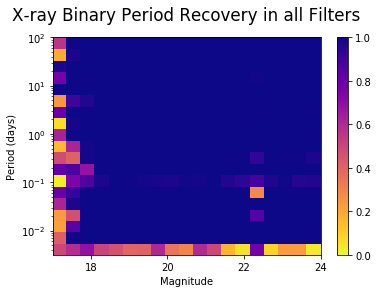

In [10]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')
plt.show()

In [11]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for y in range(0,len(fullPeriod)):
    for z in range(0, len(fullPeriod[0])):
        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
            donothing = 0
            othercount += 1
            if y == 0:
                seventeenth += 1
            if y == (len(fullPeriod)-1):
                twentyfour += 1
            if z == 0:
                lowPeriod += 1
            if z == len(fullPeriod[0]) - 1:
                highPeriod += 1
            if fullSigLevel[y][z] == 1.0:
                bigSig += 1
        else: 
            fullSigLevel[y][z] = 0
            count += 1

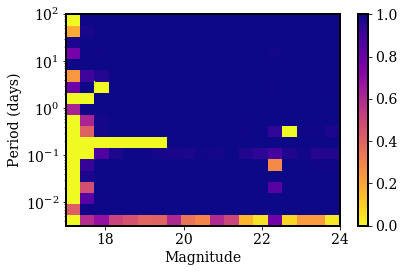

In [12]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
#plt.title('X-ray Binary Period Recovery using the Minion_1020 Observing Strategy',y=1.05)#,fontweight='semibold')
plt.tight_layout()
plt.savefig('panstars500sig.png',dpi = 500,bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [13]:
print('lowPeriod',lowPeriod/20.)
print('highPeriod',highPeriod/20.)
print('seventeenth',seventeenth/20.)
print('twentyfour',twentyfour/20.)
print('bigSig',bigSig/400.)
print('tot',othercount/400.)

lowPeriod 0.95
highPeriod 1.0
seventeenth 0.45
twentyfour 1.0
bigSig 0.735
tot 0.9475


In [8]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

4.2726


In [9]:
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

In [10]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
#rM = rfromRV(4.04,4.680)
rM = rfromRV(2.67,3.59)
print(rM)

def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

def findWeight(noSteps,fullPeriod,rM):
    
    rogrim,rtgrim,rdgrim,rzgrim,rmgrim,gamma,bulge,disc,sphere,Rc,q = 1.,1.9,3.5,0.41,6.5,1.8,2.,1.,0.8,2.8,0.6
    milkyWayRadius = 15.
    scaleHeight = 3.5
    b = np.linspace(-90.,90,noSteps)
    l = np.linspace(0., 360., noSteps)
    distance = np.linspace(0.1,30.1,noSteps)
    magrange = np.linspace(17,24,len(fullPeriod))
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    R = 2.273
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist, ztotal, zlist = [],[],[],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    magbin,magrep = [[]]*20,[]
    for i,x in enumerate(l):
        ebvPerB = []
        for lat,B in enumerate(b):
            ebvPerD = []
            for d,dis in enumerate(distance):
                coords = SkyCoord(x*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
                ebvPerD.append(bayestar(coords, mode='median'))
            string = str(ebvPerD)
            if 'nan' in string:
                ebvPerD = []
                for d,dis in enumerate(distance):
                    ebvPerD.append(m.ebv(x,0, frame='galactic', unit='degree', interpolate=False)) # calculates reddening in galactic plane
            ebvPerB.append(ebvPerD)
        ebv.append(ebvPerD)
    mag = []
    #test = {}
    for y in range(len(l)):
        magperanlge = []
        for z in range(len(b)):
            magperbangle = []
            for x,item in enumerate(distance): 
                magperbangle.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
                #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
            magperanlge.append(magperbangle)
        mag.append(magperanlge)
        

    for x,angle in enumerate(l):
        for lat,lattitude in enumerate(b):
            for y,item in enumerate(distance):
                xlen = (((item*np.cos(np.deg2rad(l[x])))-8))
                ylen = ((item*np.sin(np.deg2rad(l[x]))))
                r = ((xlen**2)+(ylen**2))**0.5
                thickness = r * np.cos(lattitude)
                width = r * np.sin(lattitude)
                if width < milkyWayRadius and thickness < scaleHeight:
                    xtotal.append(xlen)
                    ytotal.append(ylen)
                    ztotal.appends(thickness)
                    totmaglist.append(mag[x][lat][y])
                    dist = ((xlen**2)+(ylen**2))**0.5
                    Bulge = (bulge*(((((dist**2)+((thickness**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((thickness**2)/(q**2)))/rtgrim**2)))
                    Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(thickness)/rzgrim))))
                    Sphere = (sphere*(np.exp(-b*((item/Rc)**0.25))))/((item/Rc)**(7/8))
                    bp = Bulge + Disc + Sphere
                    brightProfilelist.append(bp)
                    othercounter += 1
                    if mag[x][y] > 24 or mag[x][y] < 17:
                        counter += 1
            xlist.append(xtotal)
            ylist.append(ytotal)
            totmag.append(totmaglist)
            brightProfile.append(brightProfilelist)
    

    for x,item in enumerate(magrange):
        for z in range(len(l)):
            if x < 19:
                magbin[x] = [a for a in totmag[z] if a >= magrange[x] and a<magrange[x+1]]
                #magbinNo[x] = [i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[x+1]]
                #plt.plot()
            else:
                magbin[x] = [a for a in totmag[z] if a >= magrange[x] and a<magrange[19]]
                #magbinNo[x] = [i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[19]]
    for x in range(len(magbin)):
        magrep.append(len(magbin[x]))#/len(totmag))
    magProp = [float(a)/othercounter for a in magrep]
    
    periods = [1160.8, 404.0, 33.5, 24.0667, 18.45, 16.6, 12.73, 11.8342, 9.8417, 9.0083, 6.475, 2.62, 2.5446, 2.0833, 1.7558, 1.7, 1.5521, 1.1167, 0.9375, 0.8704, 0.7896, 0.7875, 0.7125, 0.6292, 0.6125, 0.5371, 0.5225, 0.515, 0.4325, 0.3887, 0.3817, 0.3792, 0.35, 0.3482, 0.3442, 0.34, 0.3292, 0.3229, 0.3179, 0.2963, 0.285, 0.2779, 0.2483, 0.2321, 0.2183, 0.215, 0.2122, 0.1938, 0.1833, 0.1781, 0.175, 0.17, 0.1638, 0.1592, 0.1583, 0.1367, 0.1333, 0.1221, 0.1025, 0.087, 0.0839, 0.0771, 0.0675, 0.0579, 0.0346, 0.0304, 0.0296, 0.0288, 0.0278, 0.0157, 0.0143, 0.0126, 0.0125, 0.0079]
    mean,std=norm.fit(periods)
    gauss = []
    for T in range(len(fullPeriod[0])):    
        gauss.append(gaussian(mean,std,fullPeriod[0][T]))

    normalised = [x/sum(gauss) for x in gauss]
    weight = []
    for x in range(len(fullPeriod)):
        for y in range(len(fullPeriod[x])):
            weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x])#*brightProfile[x][y])
    
    return sum(weight)

2.9978


In [ ]:
bayestar = BayestarQuery(max_samples=2)
m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')

In [42]:
def findWeight(l,b,r,rM,bayestar=bayestar,m=m):
    rogrim,rtgrim,rdgrim,rzgrim,rmgrim,gamma,bulge,disc,sphere,Rc,q = 1.,1.9,3.5,0.41,6.5,1.8,2.,1.,0.8,2.8,0.6
    milkyWayRadius = 15.
    scaleHeight = 3.5
    
    magrange = np.linspace(13,20,20)
    redrange = np.linspace(0.054,14,20)
    
    ebv=[]
   
    R = 2.273
    Rd = 3 #kpc
    coords = SkyCoord(l*units.deg, b*units.deg,distance=(r*1000)*units.pc, frame='galactic')
    ebv = (bayestar(coords, mode='median'))
    string = str(ebv)
    if 'nan' in string:
        newl = l 
        while 'nan' in string:
            newl += -1
            coords = SkyCoord((newl)*units.deg, b*units.deg,distance=(r*1000)*units.pc, frame='galactic')
            ebv = (m.ebv(coords, mode='median')) # calculates reddening in galactic plane
            string = str(ebv)
            print(string)
            
    mag = (5*np.log10((r*(1000/10)))+rM)
    reddening = ((ebv)*R)
    
    radius = r * np.cos(b)
    thickness = r * np.sin(b)
                   
    xlen = (((radius*np.cos(np.deg2rad(l)))-8))
    ylen = ((radius*np.sin(np.deg2rad(l))))
    dist = ((xlen**2)+(ylen**2))**0.5
                   
    Bulge = (bulge*(((((dist**2)+((thickness**2)/(q**2)))**0.5)/rogrim)**-gamma)*np.exp(-(((dist**2)+((thickness**2)/(q**2)))/rtgrim**2)))
    Disc = (disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)-(abs(thickness)/rzgrim))))
    Sphere = (sphere*(np.exp(-b*((r/Rc)**0.25))))/((r/Rc)**(7/8))
    bp = Bulge + Disc + Sphere
    
    magbin = -1
    redbin = -1
    for x,item in enumerate(magrange):
        if ebv <= redrange[0]:
            redbin = 0     
        if x < 19:
            if mag >= magrange[x] and mag <= magrange[x+1]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[x+1]:
                redbin = x
        else:
            if mag >= magrange[x] and mag <= magrange[19]:
                magbin = x
            if ebv >= redrange[x] and ebv <= redrange[19]:
                redbin = x
         
    
    results = {}
    results[0] = [xlen,ylen,thickness]
    results[1] = mag
    results[2] = magbin
    results[3] = ebv
    results[4] = redbin
    results[5] = bp
    
    return results

0.0146474000692
0.0146474000692
0.0146474000692
0.0146474000692
0.0146474000692
0.0146474000692
0.0146474000692
0.0146474000692
0.0127074514231
0.0127074514231
0.0127074514231
0.0127074514231
0.0566821208024
0.0566821208024
0.102803705129
0.102803705129
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0949631961755
0.0129653362569
0.0129653362569
0.0129653362569
0.0129653362569
0.0129653362569
0.0129653362569
0.0129653362569
0.0129653362569
0.00604771152439
0.00604771152439
0.00604771152439
0.00604771152439
0.0185895893585
0.0185895893585
0.0119825463999
0.0119825463999
0.0119825463999
0.0119825463999
0.0119825463999
0.0119825463999
0.0119825463999
0.0119825463999
0.021303148132
0.021303148132
0.021303148132
0.021303148132
0.0725968391437
0.0725968391437
0.189612621168
0.189612621168
0.150608840031
0.150608840031
0.150608840031
0.150608840031
0.150608840031
0.150608840031
0.150608840031
0.1

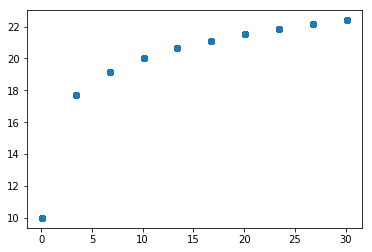

In [53]:
noSteps = 10
#b = [0]
b = np.linspace(-90.,90,noSteps)
l = np.linspace(0., 360., noSteps)
radialDistance = np.linspace(0.1,30.1,noSteps)

dist = []
coords = []
mag = []
finalResult = []

magrange = np.linspace(13,22,20)
resultList = []
for x,angle in enumerate(l):
    resultPerB = []
    for lat,lattitude in enumerate(b):
        resultPerD = []
        for y,item in enumerate(radialDistance):
            width = item * np.cos(lattitude)
            thickness = item * np.sin(lattitude)
            if width < 15 and thickness < 3.5:
                result = findWeight(angle,lattitude,item,5)
                resultList.append(result)
                coords.append(result[0])
                distance = ((result[0][0]**2)+(result[0][1]**2))**0.5
                dist.append(item)
                mag.append(result[1])
    
                
                resultPerD.append(result)
        resultPerB.append(resultPerD)
    finalResult.append(resultPerB)
plt.plot(dist,mag,'o') 
plt.show()

[{0: [-8.0448073616129179, -0.0, -0.089399666360055793],
  1: 10.0,
  2: -1,
  3: 0.014459999,
  4: 0,
  5: 78489003237142784.0},
 {0: [-9.538386082043484, -0.0, -3.0693885450285823],
  1: 17.678579849927551,
  2: 12,
  3: 0.033070356,
  4: 0,
  5: 1.0809593556003331e+41},
 {0: [-11.03196480247405, -0.0, -6.0493774236971083],
  1: 19.151873915967752,
  2: 16,
  3: 0.033106521,
  4: 0,
  5: 4.3348306264721294e+48},
 {0: [-12.525543522904618, -0.0, -9.0293663023656343],
  1: 20.021606868913214,
  2: -1,
  3: 0.033110432,
  4: 0,
  5: 5.8810293808438969e+53},
 {0: [-14.019122243335186, -0.0, -12.009355181034161],
  1: 20.640918957107235,
  2: -1,
  3: 0.033122815,
  4: 0,
  5: 5.6287544174118096e+57},
 {0: [-15.512700963765754, -0.0, -14.989344059702688],
  1: 21.122233651681327,
  2: -1,
  3: 0.033131223,
  4: 0,
  5: 1.1127741020488319e+61},
 {0: [-17.006279684196322, -0.0, -17.969332938371213],
  1: 21.515980287102444,
  2: -1,
  3: 0.033135161,
  4: 0,
  5: 7.6194728138918072e+63},
 {

In [52]:
M = 5
d = 23.2
m = M + 5*(np.log10(d*1000)-1)
print(m)
#M = m-5*(np.log(d)-1)

21.8274399245


In [51]:
((23**2)+9)**0.5

23.194827009486403

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


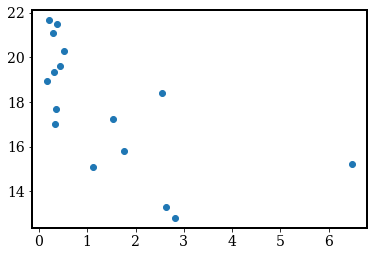

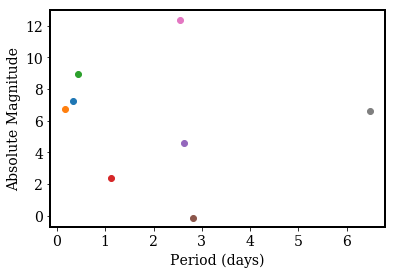

17.808125 2.70837409424


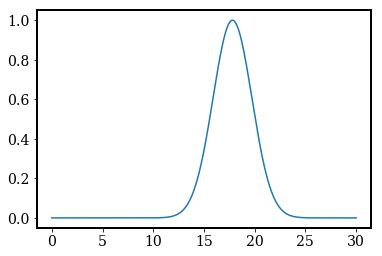

-0.143846540382 6.3869715874 -0.0780995176208 0.854157778239 0.74962988428


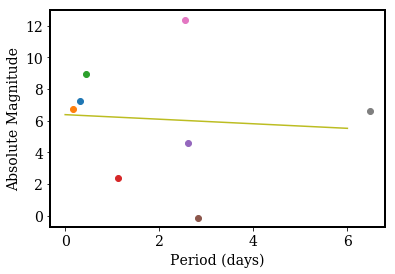

In [51]:
Name = ['GRO J0422+32','A0620-00','GRS 1009-45','XTE J1118+480','GRS 1124-684','4U 1543-475','XTE J1550-564','GRO J1655-40','GX 339-4','H 1705-250','SAX J1819.3-2525','XTE J1859+226','GS 2000+251','XTE J1650-500','GS 1354-64','GS 2023+338']
distance = [0,1.57,0,2.86,2.04,7.02,0,3.51,0,0,5.77,0,0,0,0.67,2.37]
Porb = [5.1,7.8,6.8,4.1,10.4,26.8,37.0,62.9,42.1,12.5,67.6,9.2,8.3,7.6,61.1,155.3]
mv = [22.4,18.2,21.7,19.,20.5,16.6,22.0,17.3,19.2,21.5,13.7,23.29,21.7,24.0,21.5,18.5]
Av = [0.74,1.21,0.62,0.06,0.9,1.5,4.75,4.03,3.4,1.2,0.9,1.8,4.,4.65,3.1,3.3]
Porb = [x/24 for x in Porb]
Mv = [a-b for a,b in zip(mv,Av)]

absoluteM = [apparent - 5*(np.log10(d*1000)) + 5  for apparent,d in zip(mv,distance)]

plt.plot(Porb,Mv,'o')
plt.show()

newname,newdistance,newPorb,newabsoluteM = [],[],[],[]

for x in range(len(absoluteM)):
    if distance[x] != 0:
        newname.append(Name[x])
        newdistance.append(distance[x])
        newPorb.append(Porb[x])
        newabsoluteM.append(absoluteM[x])
        plt.plot(Porb[x],absoluteM[x],'o')
plt.xlabel('Period (days)')
plt.ylabel('Absolute Magnitude')
plt.show()

def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y
print(np.mean(Mv),np.std(Mv))
mean  = np.mean(Mv)
std = np.std(Mv)
z = np.linspace(0,30,1000)
zy = []
for x in range(len(z)):
    zy.append(gaussian(mean,std,z[x]))
plt.plot(z,zy)
plt.show()



slope, intercept, r_value, p_value, std_err = stats.linregress(newPorb,newabsoluteM)
print(slope, intercept, r_value, p_value, std_err)

for x in range(len(absoluteM)):
    if distance[x] != 0:
        plt.plot(Porb[x],absoluteM[x],'o')
x=np.linspace(0,6,1000)
y = [intercept+(c*slope) for c in x]
plt.xlabel('Period (days)')
plt.ylabel('Absolute Magnitude')
#plt.show()
#plt.plot(Porb,Mv,'o')
plt.plot(x,y)
plt.show()

In [21]:
# ### change to different dust map, include distance reddening?
# ebv=[]
# R = 2.273
# m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
# for i,x in enumerate(l):
#     ebv.append(m.ebv(x,0, frame='galactic', unit='degree', interpolate=False)) # calculates reddening in galactic plane

In [22]:
bayestar = BayestarQuery(max_samples=2)
ebv=[]
ebv1d = []
m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')

l = np.linspace(0., 360., 61)
R = 2.273
for i,x in enumerate(l):
    ebvPerD = []
    for d,dis in enumerate(distance):
        coords = SkyCoord(x*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
        ebvPerD.append(bayestar(coords, mode='median'))
    string = str(ebvPerD)
    if 'nan' in string:
        ebvPerD = []
        for d,dis in enumerate(distance):
            ebvPerD.append(m.ebv(x,0, frame='galactic', unit='degree', interpolate=False)) # calculates reddening in galactic plane
    ebv.append(ebvPerD)
    #ebv1d.extend(ebvPerD)
    

NameError: name 'distance' is not defined

In [53]:
5*np.log10(5.57*1000)

18.729275975868646

In [ ]:
mag = []
#test = {}
for y in range(len(l)):
    magperanlge = []
    for x,item in enumerate(distance): 
        magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
        #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
    mag.append(magperanlge)


In [ ]:
totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
xtotal, xlist, ytotal, ylist = [],[],[],[]
Rd = 3 #kpc
counter = 0
othercounter = 0
for x,angle in enumerate(l):
    for y,item in enumerate(distance):
        xlen = (((item*np.cos(np.deg2rad(l[x])))-8))
        ylen = ((item*np.sin(np.deg2rad(l[x]))))
        
        if xlen**2+ylen**2 < 15**2:
            xtotal.append(xlen)
            ytotal.append(ylen)
            totmaglist.append(mag[x][y])
            dist = ((xlen**2)+(ylen**2))**0.5
            brightProfilelist.append(np.exp(-(dist/Rd)))
            othercounter += 1
            if mag[x][y] > 24 or mag[x][y] < 17:
                counter += 1
    xlist.append(xtotal)
    ylist.append(ytotal)
    totmag.append(totmaglist)
    brightProfile.append(brightProfilelist)
        
#                 plt.plot(xlen, ylen, 'o', color='k', markersize=2)
#             else:
#                 plt.plot(xlen, ylen, 'o', color='y', markersize=2)
# plt.show()


In [ ]:
tot = 0
Len = 0
for x in range(len(brightProfile)):
    tot += sum(brightProfile[x])
    Len += len(brightProfile[x])
    
normalisation = (Len/tot)
for x in range(len(brightProfile)):
    brightProfile[x] = [a*normalisation for a in brightProfile[x]]

total = 0
for x in range(len(brightProfile)):
    total += (sum(brightProfile[x]))
print(total)

In [ ]:
othercounter

In [ ]:
### Cuurently using a uniform distribution of LMXBs, to change to sersic profile, multiple each positions magnitude
### by the likelyhood of a lmxb being there. Then normalise by dividing by the total number of positions multiplied by 
### their respective proportions. 


magbin = [[]]*20
magrep = []
#magbinNo = [[]]*20
for x,item in enumerate(magrange):
    for z in range(len(l)):
        if x < 19:
            magbin[x] = [a for a in totmag[z] if a >= magrange[x] and a<magrange[x+1]]
            #magbinNo[x] = [i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[x+1]]
            #plt.plot()
        else:
            magbin[x] = [a for a in totmag[z] if a >= magrange[x] and a<magrange[19]]
            #magbinNo[x] = [i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[19]]
for x in range(len(magbin)):
    magrep.append(len(magbin[x]))#/len(totmag))
magProp = [float(a)/othercounter for a in magrep]


In [ ]:
# plt.plot(xlist,ylist,'o',c=totmag)
# plt.show()

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi,interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(xlist[0], ylist[0], totmag[0])
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('kpc')
plt.ylabel('kpc')
plt.show()


In [ ]:
plt.plot(magrange[0:19],magProp[0:19])
plt.ylabel('Fractional Proportion')
plt.xlabel('magnitude')
plt.show()

In [ ]:
# plt.plot(distance,brightProfile)
# plt.ylabel('Power')
# plt.xlabel('Distance (kpc)')
# plt.show()

In [11]:
periods = [2.8,7.69,4.07,6.58,67.61,37,62.92,6.844,812,5.09,10.38,155.31,8.258,61.07,12.51,7.75,42.14,26.793]
periods = [x/24 for x in periods]

18


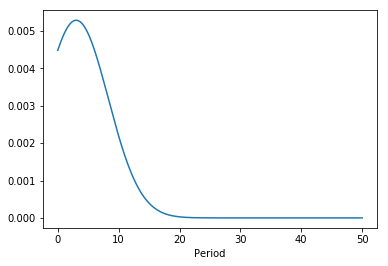

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


-0.09354218672919037 0.6170507727542387


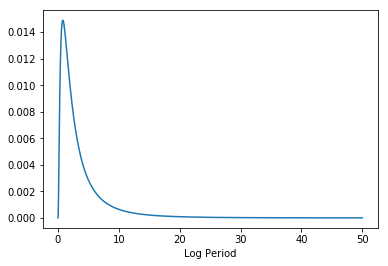

In [12]:
periods = [2.8,7.69,4.07,6.58,67.61,37,62.92,6.844,812,5.09,10.38,155.31,8.258,61.07,12.51,7.75,42.14,26.793]
periods = [x/24 for x in periods]

## fit gaussian to period data
#periods = [1160.8, 404.0, 33.5, 24.0667, 18.45, 16.6, 12.73, 11.8342, 9.8417, 9.0083, 6.475, 2.62, 2.5446, 2.0833, 1.7558, 1.7, 1.5521, 1.1167, 0.9375, 0.8704, 0.7896, 0.7875, 0.7125, 0.6292, 0.6125, 0.5371, 0.5225, 0.515, 0.4325, 0.3887, 0.3817, 0.3792, 0.35, 0.3482, 0.3442, 0.34, 0.3292, 0.3229, 0.3179, 0.2963, 0.285, 0.2779, 0.2483, 0.2321, 0.2183, 0.215, 0.2122, 0.1938, 0.1833, 0.1781, 0.175, 0.17, 0.1638, 0.1592, 0.1583, 0.1367, 0.1333, 0.1221, 0.1025, 0.087, 0.0839, 0.0771, 0.0675, 0.0579, 0.0346, 0.0304, 0.0296, 0.0288, 0.0278, 0.0157, 0.0143, 0.0126, 0.0125, 0.0079]
mean,std=norm.fit(periods)
print(len(periods))
def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y
prange = np.linspace(0,50,1000)
gauss = []
for T in range(len(prange)):    
    gauss.append(gaussian(mean,std,prange[T]))

normalised = [x/sum(gauss) for x in gauss]
weight = []
plt.plot(prange,normalised)
plt.xlabel('Period')
plt.show()

gauss = []
periods = [np.log10(x) for x in periods]
mean,std=norm.fit(periods)
prange = [np.log10(x) for x in prange]
print(mean,std)
for T in range(len(prange)):    
    gauss.append(gaussian(mean,std,prange[T]))
normalised = [x/sum(gauss) for x in gauss]

prange = [10**(x) for x in prange]
plt.plot(prange,normalised)
plt.xlabel('Log Period')
plt.show()

# for x in range(len(fullPeriod)):
#     for y in range(len(fullPeriod[x])):
#         weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x])#*brightProfile[x][y])
#         #print(fullSigLevel[x][y],normalised[y],magProp[x],brightProfile[x][y])
# print(sum(weight))

In [177]:
# ## fit gaussian to period data

# def gaussian(average,std,xvalue):
#     y = np.exp(-(((xvalue-average)/std)**2))
#     return y

# gauss = []
# for T in range(len(fullPeriod[0])):    
#     gauss.append(gaussian(0.29,0.14,fullPeriod[0][T]))

# normalised = [x/sum(gauss) for x in gauss]
# weight = []
# for x in range(len(fullPeriod)):
#     for y in range(len(fullPeriod[x])):
#         weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x]*brightProfile[x][y])
#         #print(fullSigLevel[x][y],normalised[y],magProp[x],brightProfile[x][y])
# print(sum(weight))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
periods = [1160.8, 404.0, 33.5, 24.0667, 18.45, 16.6, 12.73, 11.8342, 9.8417, 9.0083, 6.475, 2.62, 2.5446, 2.0833, 1.7558, 1.7, 1.5521, 1.1167, 0.9375, 0.8704, 0.7896, 0.7875, 0.7125, 0.6292, 0.6125, 0.5371, 0.5225, 0.515, 0.4325, 0.3887, 0.3817, 0.3792, 0.35, 0.3482, 0.3442, 0.34, 0.3292, 0.3229, 0.3179, 0.2963, 0.285, 0.2779, 0.2483, 0.2321, 0.2183, 0.215, 0.2122, 0.1938, 0.1833, 0.1781, 0.175, 0.17, 0.1638, 0.1592, 0.1583, 0.1367, 0.1333, 0.1221, 0.1025, 0.087, 0.0839, 0.0771, 0.0675, 0.0579, 0.0346, 0.0304, 0.0296, 0.0288, 0.0278, 0.0157, 0.0143, 0.0126, 0.0125, 0.0079]
mean,std=norm.fit(periods)
#Bins = np.logspace(1,3.2,20)
#np.histogram(periods,bins=Bins)
xmin, xmax = plt.xlim()
x = np.linspace(0, 1160, 100)
y = norm.pdf(x, mean, std)
plt.hist(periods,bins='auto',normed=True)
plt.xscale('log')
plt.show()
plt.plot(x,y)
plt.xscale('log')
plt.show()

NameError: name 'norm' is not defined

In [153]:
print(mean,std)

23.4591283784 141.078000801


In [97]:
for x in range(len(magProp)):
    print(np.mean(magProp[x]))

0.0173812282735
0.0196987253766
0.0260718424102
0.0260718424102
0.0301274623407
0.0295480880649
0.0260718424102
0.0278099652375
0.0260718424102
0.0231749710313
0.0254924681344
0.0289687137891
0.0324449594438
0.0312862108922
0.0278099652375
0.0278099652375
0.0243337195829
0.0249130938586
0.026651216686
0.0


In [110]:
sum(weight)*1300

1579.9188223997198

In [91]:
# K0 M(V)=+5.9 main seq.

# Giant +0.7.

# V-R=+0.64 (seq)

# +0.77 (Giant)

400

In [ ]:
# m-M = 5log(d) - 5 = 5log(d/10pc)
# m = 5log(d/10pc) + M
#ktype = [0,7.453200000000001,4.48,2.924,1.2134736842105265,-0.06871578947368412,0.5312842105263158]
